# Exercício de Programação 3: SVD truncado

<font color="red">**Prazo de submissão: 23:55 do dia 11/09/2020** </font>

2020.1 Álgebra Linear Computacional - DCC - UFMG

Erickson - Fabricio

Instruções:
* Antes de submeter suas soluções, certifique-se de que tudo roda como esperado. Primeiro, **reinicie o kernel** no menu, selecione Kernel$\rightarrow$Restart e então execute **todas as células** (no menu, Cell$\rightarrow$Run All)
* Apenas o arquivo .ipynb deve ser submetido. Ele não deve ser compactado.
* Não deixe de preencher seu nome e número de matrícula na célula a seguir

**Nome dos alunos:** Diego Vinicius de Oliveira Silva<br>
                     Vinícius Correia<br>
                     Rafael Lenti<br>
                     Lucca Silva<br>

**Matriculas:** 2019054471<br>
                2019055044<br>
                2019054951<br>
                2019054773<br>

Neste exercício vamos estudar as aproximações obtidas pelo SVD truncado. Vamos começar carregando os dados do 20_newsgroups.

*Traduzido da documentação do scikit learn:*
"O conjunto de dados "20 newsgroups" compreende cerca de 18.000 postagens de grupos de notícias em 20 tópicos divididos em dois subconjuntos: um para treinamento (ou desenvolvimento) e outro para teste (ou para avaliação de desempenho). A divisão entre o trem e o conjunto de teste é baseada em mensagens postadas antes e depois de uma data específica."

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [3]:
%time U, s, Vt = linalg.svd(vectors, full_matrices=False)

CPU times: user 45.2 s, sys: 3.06 s, total: 48.2 s
Wall time: 13.8 s


# Questão 1

Usando a função plot de plt, crie um gráfico que mostre os valores singulares da matriz vectors.

Text(0, 0.5, 'valores singulares')

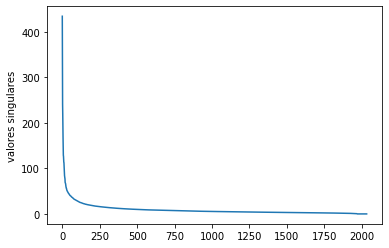

In [4]:
# solucao da Questao 1

### BEGIN SOLUTION
plt.plot(s);
### END SOLUTION
plt.ylabel('valores singulares')

## Questão 2

Repita o gráfico da questão anterior, mas desta vez, tente dar um "zoom" para mostrar onde está o joelho da curva, ou seja, o ponto a partir do qual os valores passam a ser muito baixos. Para isto, você pode pegar um slice de ```s```, ou usar a função ```plt.xlims```.

Text(0, 0.5, 'valores singulares')

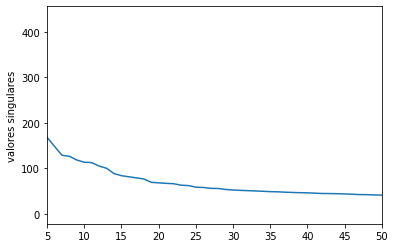

In [5]:
# solucao da Questao 2

### BEGIN SOLUTION
plt.xlim([5, 50])
plt.plot(s)
### END SOLUTION
plt.ylabel('valores singulares')

## Questão 3

Seja $A$ uma matriz $m \times n$. O SVD reduzido de $A$ retorna $U_{m \times k}$, $\Sigma_{k \times k}$ e $V^\top_{k \times n}$, onde $k = \min(m,n)$. Já o SVD truncado de posto $r < \min(m,n)$ retorna apenas as $r$ primeiras colunas de $U$, os $r$ maiores valores singulares de $\Sigma$ e as $r$ primeiras linhas de $V^\top$.

Uma propriedade importante do SVD truncado é que ele retorna a melhor aproximação $A_r$ para uma matriz $A$ dentre todas as matrizes de posto $r$, onde a qualidade da aproximação é medida por $\| A - A_r \|_F$, sendo $\| B \|_F = \sqrt{\sum_i \sum_j B_{i,j}^2}$ a norma de Frobenius de uma matriz $B$.

Nesta questão, vamos ver como a qualidade da aproximação aumenta com $r$, variando $r$ em $\{1,2,4,\ldots,2^7\}$. Primeiramente, vamos encontrar a decomposição SVD reduzida para a matriz ```vectors```. Depois disso, vamos variar o número $r$ de valores singulares considerados para encontrar aproximações $A_r$ para, finalmente, calcular $\| A - A_r \|_F$. Para facilitar a resolução deste problema, parte do código já foi fornecida. Para calcular a norma Frobenius, consulte a documentação de ```np.linalg.norm```.

Text(0.5, 0, 'r')

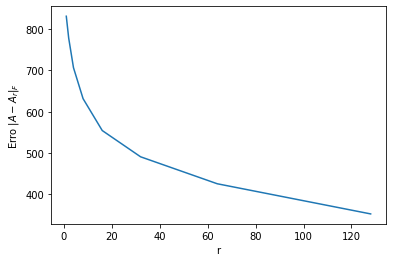

In [6]:
#solucao da Questao 3

m,n = vectors.shape
k = min(m,n)

A_r = np.zeros((m,n))
erro = np.zeros(8)
r_values = 2**np.arange(8)
sigma = np.diag(s)
for i in range(len(r_values)):
    r = r_values[i]
    ### BEGIN SOLUTION
    # calcular a aproximacao A_r de posto r para A
    s_sliced = sigma[:r, :r]
    U_sliced = U[:U.shape[0], :r]
    Vt_sliced = Vt[:r, :Vt.shape[1]]
    
    A_r = U_sliced.dot(s_sliced.dot(Vt_sliced))
    norm_A_r = np.linalg.norm(vectors - A_r, 'fro')
    
    erro[i] = norm_A_r
    ### END SOLUTION

# código para plotar o vetor erro
### BEGIN SOLUTION
plt.plot(r_values, erro)
### END SOLUTION
plt.ylabel(r'Erro $\|A-A_r\|_F$')
plt.xlabel('r')

## Questão 4

Vamos criar e implementar a heurística para a escolha de $k$ vista nas vídeo aulas. Deseja-se obter uma representação de baixa dimensão $k$ para a matriz ```vectors```, tal que a soma dos quadrados dos $k$ maiores valores singulares é pelo menos 80% da soma dos quadrados de todos os valores singulares. Implemente uma função que recebe um vetor de valores singulares em ordem decrescente e retorna o menor $k$ que satisfaz esta condição.

In [7]:
# solucao da Questao 4

def escolheK(s):
    """ Retorna o menor k tal que a soma dos quadrados dos k primeiros elementos do array s é >= 80%
        da soma dos quadrados dos elementos de s.
    
        Entrada:
            s é um vetor contendo os valores singulares em ordem decrescente
    """
    k = 0
    ### BEGIN SOLUTION
    sumSquares = 0
    for i in range(len(s)):
        sumSquares += s[i] * s[i]
        
    parcialSumSquares = 0
    for i in range(len(s)):
        parcialSumSquares += s[i] * s[i]
        if (parcialSumSquares / sumSquares  >= 0.8):
            k = i + 1
            break;
        
    ### END SOLUTION
    return k

In [8]:
s_example = np.hstack((np.arange(1000,100,-100),np.arange(100,10,-10),np.arange(10,1,-1)))
print(s_example)

assert escolheK(s_example) == 5
assert escolheK(s) == 69

[1000  900  800  700  600  500  400  300  200  100   90   80   70   60
   50   40   30   20   10    9    8    7    6    5    4    3    2]
